In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("D:\Fraud\Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There is no missing value in the data so no need of data cleaning but we go for data analusis

In [4]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [5]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

This data set is inbalance

In [6]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

Text(0, 0.5, 'Amount')

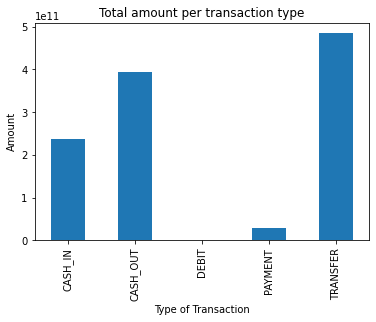

In [7]:
type_ = df.groupby('type').amount.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
type_.plot(kind='bar')
ax1.set_title("Total amount per transaction type")
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('Amount')

<AxesSubplot:>

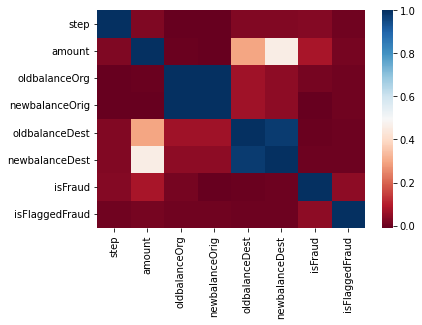

In [8]:
sns.heatmap(df.corr(),cmap='RdBu')

Things we can conclude from this heatmap:
  OldbalanceOrg and NewbalanceOrg are highly correlated.
  OldbalanceDest and NewbalanceDest are highly correlated.

# Drop some features

Out of 6362620 transection only 16 are isflaggedfraud transection so this feature is not contributing in model training

'nameOrig' and 'nameDest' also not important feature 

OldbalanceOrg and NewbalanceOrg are highly correlated.
  OldbalanceDest and NewbalanceDest are highly correlated.

In [9]:
df1=df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud','newbalanceOrig','newbalanceDest'],axis=1)

In [10]:
df1

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,1
3,1,CASH_OUT,181.00,181.00,21182.00,1
4,1,PAYMENT,11668.14,41554.00,0.00,0
...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,68488.84,1
6362618,743,TRANSFER,850002.52,850002.52,0.00,1


In [11]:
df1.loc[df.isFraud == 1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

So we can see all the fraud are happening in "Transfer" and "Cash_out"

In [12]:
df2=df1.loc[df1['type'].isin(['TRANSFER' ,'CASH_OUT'])]
df2

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud
2,1,TRANSFER,181.00,181.00,0.00,1
3,1,CASH_OUT,181.00,181.00,21182.00,1
15,1,CASH_OUT,229133.94,15325.00,5083.00,0
19,1,TRANSFER,215310.30,705.00,22425.00,0
24,1,TRANSFER,311685.89,10835.00,6267.00,0
...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,68488.84,1
6362618,743,TRANSFER,850002.52,850002.52,0.00,1


In [13]:
df2 = df2.replace(to_replace={'TRANSFER':1,'CASH_OUT':2})

In [14]:
# Defining the variables that will enter the model:
x=df2.drop('isFraud',axis=1)
y=df2['isFraud']

# Variable imbalance

In [15]:
y.value_counts()

0    2762196
1       8213
Name: isFraud, dtype: int64

# Machine learning model

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size = 0.2)

In [28]:
#===== Logistic Regression =========================

# Creating the model:
model_lr=LogisticRegression(random_state=100)
 
# Fitting the Model
model_lr.fit(x_train, y_train)

# Predicting the data
y_pred=model_lr.predict(x_test)

#Metrics:
accuracy_lr = accuracy_score(y_test, y_pred, normalize=True)
f1_lr = f1_score(y_test, y_pred, average='binary')

In [24]:
accuracy_lr

0.9943383831274072

In [29]:
f1_lr

0.05767497747071192

In [27]:

# Creating the model:
model_dt = DecisionTreeClassifier( max_depth = 6, min_samples_leaf = 8)

# Fitting the Model (Using the training data to train the model):
model_dt.fit(x_train, y_train)
  
# Predicting the data and comparing the result with the test values:
y_pred = model_dt.predict(x_test)

accuracy_dt = accuracy_score(y_test, y_pred, normalize=True)
f1_dt = f1_score(y_test, y_pred, average='binary')

In [26]:
accuracy_dt

0.9981916034088817

In [30]:
f1_dt

0.5407882676443629

In [31]:
#===== KNN =========================================
  
# Creating the model and Fitting the Model:
model_knn = KNeighborsClassifier(n_neighbors=7).fit(x_train, y_train)

# Predicting the data
y_pred = model_knn.predict(x_test)

# Metrics:
accuracy_knn = accuracy_score(y_test, y_pred, normalize=True)
f1_knn = f1_score(y_test, y_pred, average='binary')

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [32]:
accuracy_knn

0.9987510873841778

In [33]:
#===== Random Forest Classifier =========================
    
# Creating the model:  
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100, max_depth=6, min_samples_leaf=8)
    
# Fitting the Model   
model_rf.fit(x_train,y_train)
    
# Predicting the data  
y_pred=model_rf.predict(x_test)

# Metrics:
accuracy_rf = accuracy_score(y_test, y_pred, normalize=True)
f1_rf = f1_score(y_test, y_pred, average='binary')

In [34]:
accuracy_rf

0.9981952129829159

In [37]:
classification_metrics_accuracy = [accuracy_dt,accuracy_lr, accuracy_rf,accuracy_knn]

classification_metrics_f1 = [f1_dt, f1_rf, f1_lr, f1_knn ]


In [38]:
scores_df = pd.DataFrame(index=['Decision Tree', 'Random Forest', 'Logistic Regression', 'KNN'], 
columns=['Accuracy', 'F1'])

scores_df['Accuracy'] = classification_metrics_accuracy
scores_df['F1'] = classification_metrics_f1
scores_df.style.highlight_max(color = 'green')

,Accuracy,F1
Decision Tree,0.998192,0.540788
Random Forest,0.994338,0.541284
Logistic Regression,0.998195,0.057675
KNN,0.998751,0.772518
